response onset based on CC

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

import sys

sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis/py_functions')

from scipy.stats import norm
from tkinter import *
import scipy
from scipy import signal
import significance_funcs as sf
import platform
from glob import glob
from scipy.spatial import distance
import basic_func as bf
from scipy.integrate import simps
from numpy import trapz
import IO_func as IOF
import BM_func as BMf
import tqdm
from matplotlib.patches import Rectangle
from pathlib import Path
import LL_funcs as LLf
import freq_funcs as ff
#
from scipy.signal import hilbert, butter, filtfilt
import scipy.stats as stats
from tqdm.notebook import trange, tqdm
import significance_funcs as sig_func
cwd             = os.getcwd()

##all 
cond_vals   = np.arange(4)
cond_labels = ['BM', 'BL', 'Fuma', 'Benzo']
cond_colors = ['#494159','#594157', "#F1BF98","#8FB996"]
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab

In [2]:
Fs             = 500
dur            = np.zeros((1,2), dtype=np.int32)
t0 = 1
dur[0,0] =  -t0
dur[0,1] =  3


#dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax           = np.arange(dur[0,0],dur[0,1],(1/Fs))
color_elab      = np.zeros((4,3))
color_elab[0,:] = np.array([31, 78, 121])/255
color_elab[1,:] = np.array([189, 215, 238])/255
color_elab[2,:] = np.array([0.256, 0.574, 0.431])
color_elab[3,:] = np.array([1, 0.574, 0])

## 1 Patient

In [3]:
folder='BrainMapping' 
cond_folder='CR'

In [4]:
subjs = ['EL010', 'EL011', 'EL012', 'EL013', 'EL014', 'EL015', 'EL016', 'EL017', 'EL019', 'EL020']
i = 1

In [5]:
start 

NameError: name 'start' is not defined

In [8]:
subjs = ['EL010', 'EL011', 'EL012', 'EL013', 'EL014', 'EL015', 'EL016', 'EL017', 'EL019', 'EL020']
start_subj = 1
for subj in subjs:
    print('loading -- '+subj, end='\r')
    path_gen = os.path.join(sub_path+'Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment'
    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'
    path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj
    files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*')
    stimlist = pd.read_csv(files_list[0])
    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)
    
    file_t_resp = path_patient_analysis + '\\' + folder + '\\data\\M_tresp.npy'  # for each connection: LLsig (old), t_onset (old), t_resp, CC_p, CC_LL1, CC_LL2
    file_CC_surr = path_patient_analysis + '\\' + folder + '\\data\\M_CC_surr.csv'
    file_CC_summ = path_patient_analysis + '\\' + folder + '\\data\\CC_summ.csv'
    file_GT = path_patient_analysis + '\\' + folder + '\\data\\M_CC.npy'

    CC_summ = pd.read_csv(file_CC_summ)
    if start_subj:
        CC_subjs = CC_summ
        start_subj = 0
    else:
        CC_subjs = pd.concat([CC_subjs,CC_summ])
        CC_subjs = CC_subjs.reset_index(drop=True)


In [16]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()
    
cmap_org = 'winter'
n = 45
viridis = cm.get_cmap(cmap_org, n)
viridis_org = viridis(np.linspace(0, 1, n))
color_b = np.array([ viridis_org[0], viridis_org[15], viridis_org[30], viridis_org[-1]])

n = 100
viridis = cm.get_cmap(cmap_org, n)
viridis_new = viridis(np.linspace(0, 1, n))

inter_col = np.zeros((15,4))
for i in range(4):
    inter_col[:,i] =np.linspace(color_b[0,i], color_b[1,i], 15)
    
# 1. 
inter_col = np.zeros((15,4))
for i in range(4):
    inter_col[:,i] =np.linspace(color_b[0,i], color_b[1,i], 15)
    
viridis_new[0:15,:] =inter_col

# 2. 
inter_col = np.zeros((15,4))
for i in range(4):
    inter_col[:,i] =np.linspace(color_b[1,i], color_b[2,i], 15)
    
viridis_new[15:30,:] =inter_col

# 3. 
inter_col = np.zeros((70,4))
for i in range(4):
    inter_col[:,i] =np.linspace(color_b[2,i], color_b[3,i], 70)
    
viridis_new[30:100,:] =inter_col

color_dist = np.array([viridis_new[0], viridis_new[20], viridis_new[70]])

Text(0, 0.5, 'LL_')

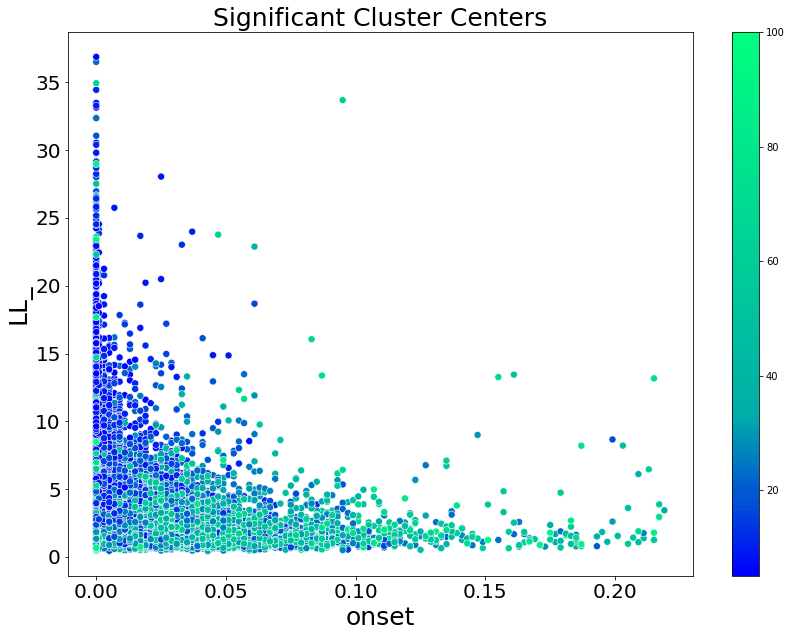

In [33]:
yy = 'LL_WOI'
colormap_d = ListedColormap(viridis_new)
data_plot = CC_subjs[(CC_subjs.onset>-0.001)&(CC_subjs.onset<0.22)&(CC_subjs.SNR<15)&(CC_subjs.art==0)&(CC_subjs.sig_w==1)&(CC_subjs.d>5)]
norm = plt.Normalize(data_plot['d'].min(), 100)
#sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)

fig = plt.figure(figsize=(14,10))
g = sns.scatterplot(x='onset', y=yy, c=data_plot.d, s=50,data= data_plot, cmap =colormap_d)
scalarmappaple = cm.ScalarMappable(norm=norm, cmap=colormap_d)
fig.colorbar(scalarmappaple)
plt.title('Significant Cluster Centers', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('onset', fontsize=25)
plt.ylabel(yy[:3], fontsize=25)

<IPython.core.display.Javascript object>


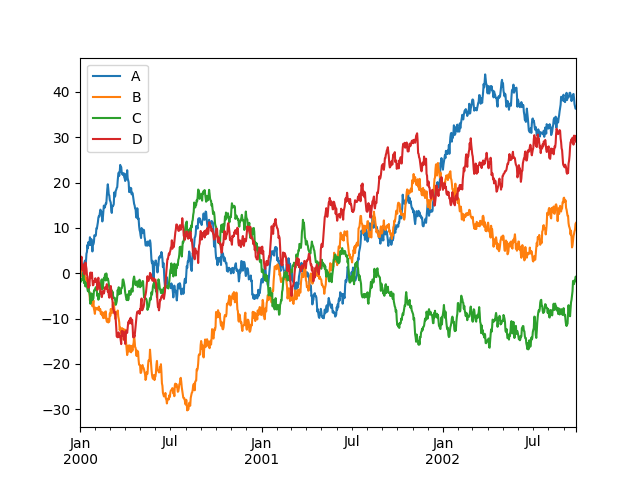

In [46]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); plt.legend(loc='best')    

In [ ]:

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


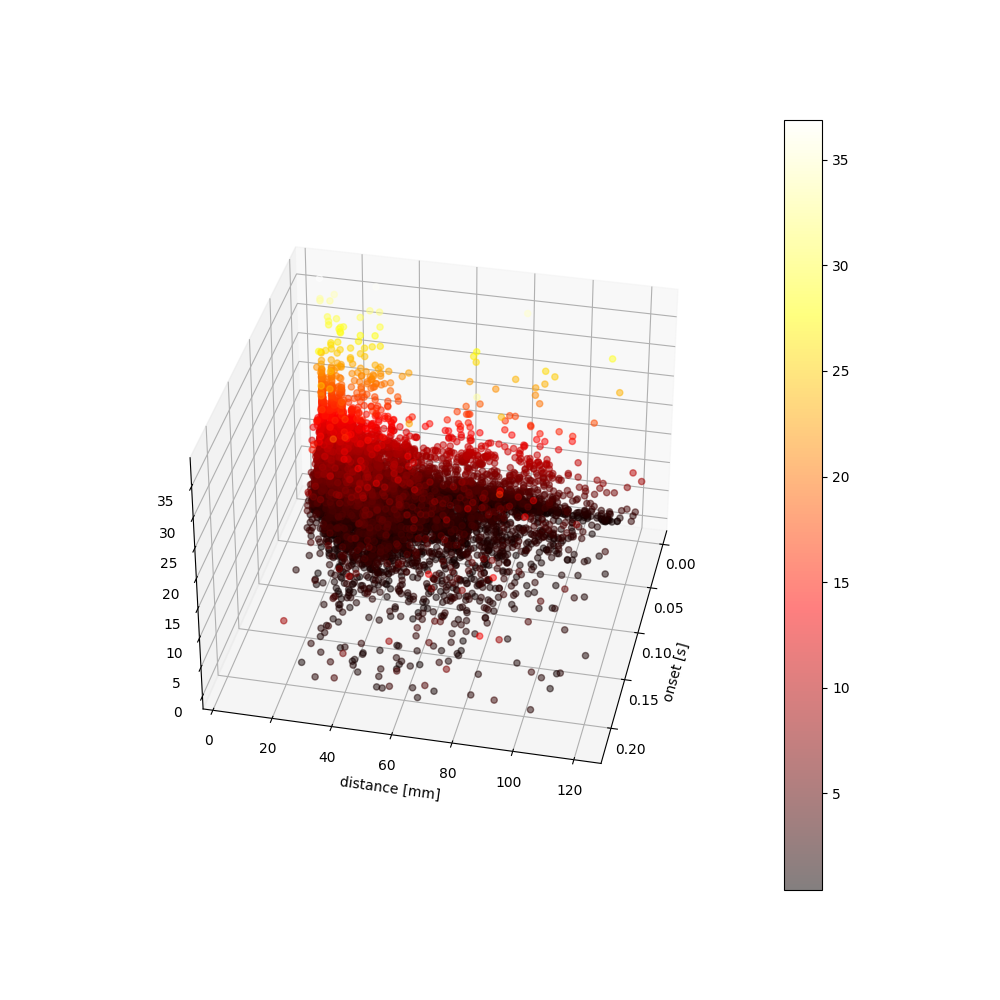

Text(0.5, 0.5, 'distance [mm]')

In [51]:
%matplotlib qt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = data_plot.onset.values, data_plot.d.values, data_plot.LL_WOI.values
scatter_plot = ax.scatter(X, Y,np.array([Z]), c= Z , cmap='hot',alpha=0.5)
plt.colorbar(scatter_plot)
plt.xlabel('onset [s]')
plt.ylabel('distance [mm]')


<IPython.core.display.Javascript object>


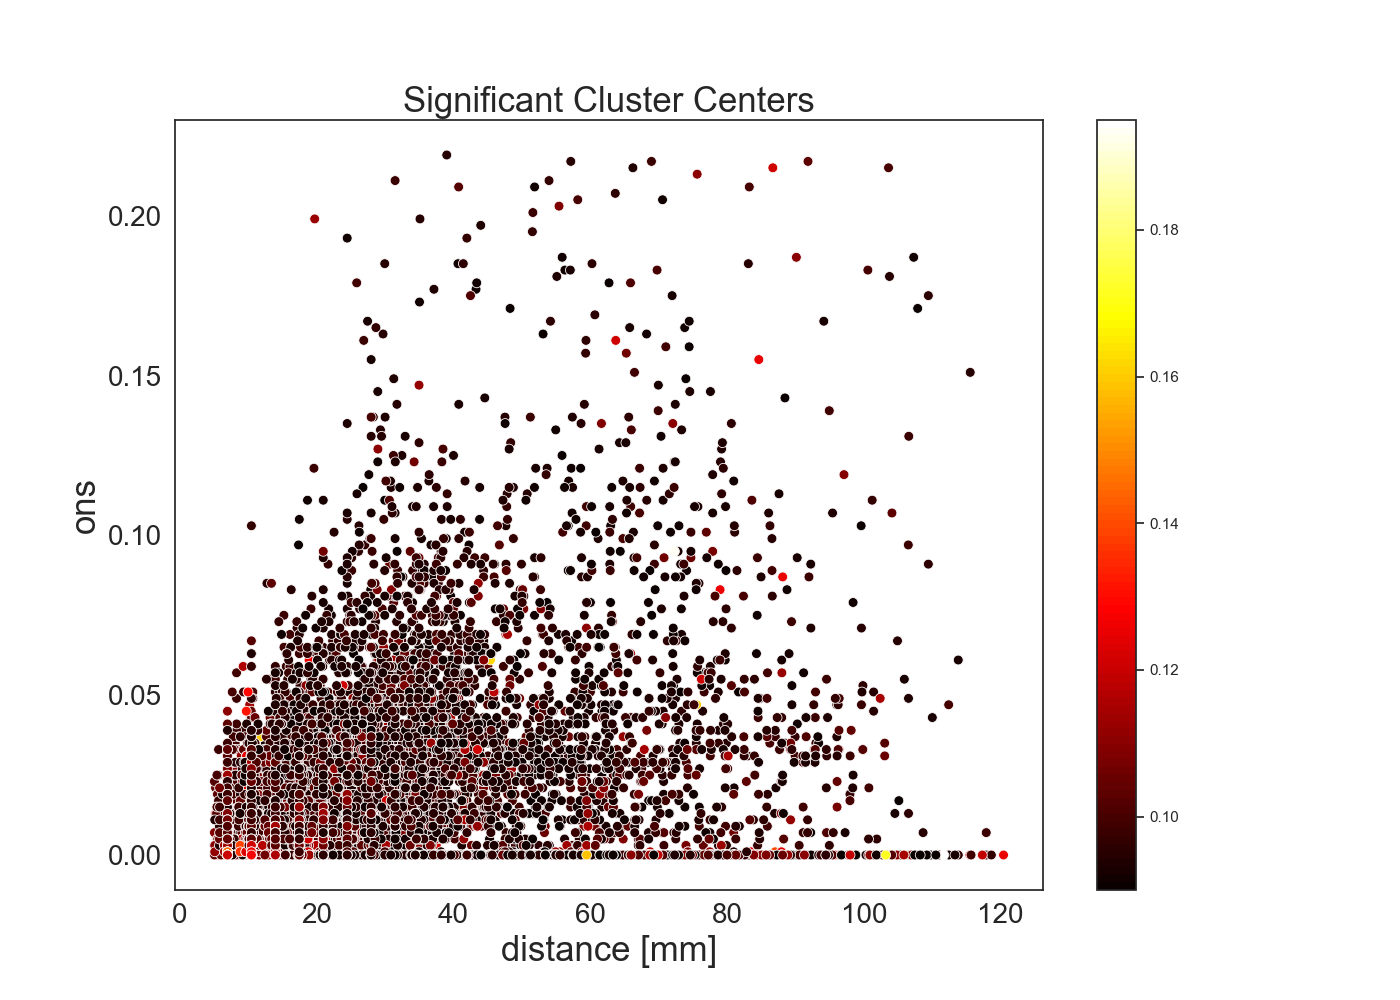

Text(0, 0.5, 'ons')

In [133]:
yy = 'onset'
cc = 'SNR'
colormap_d = cm.get_cmap('hot', n)
data_plot = CC_subjs[(CC_subjs.onset>-0.001)&(CC_subjs.onset<0.22)&(CC_subjs.SNR<15)&(CC_subjs.art==0)&(CC_subjs.sig_w==1)&(CC_subjs.d>5)]
norm = plt.Normalize(data_plot[cc].min(), 0.1)
#sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)


fig = plt.figure(figsize=(14,10))
g = sns.scatterplot(x='d', y='onset', c=data_plot[cc], s=50,data= data_plot, cmap =colormap_d)
scalarmappaple = cm.ScalarMappable(norm=norm, cmap=colormap_d)
fig.colorbar(scalarmappaple)
plt.title('Significant Cluster Centers', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('distance [mm]', fontsize=25)
plt.ylabel(yy[:3], fontsize=25)

<IPython.core.display.Javascript object>


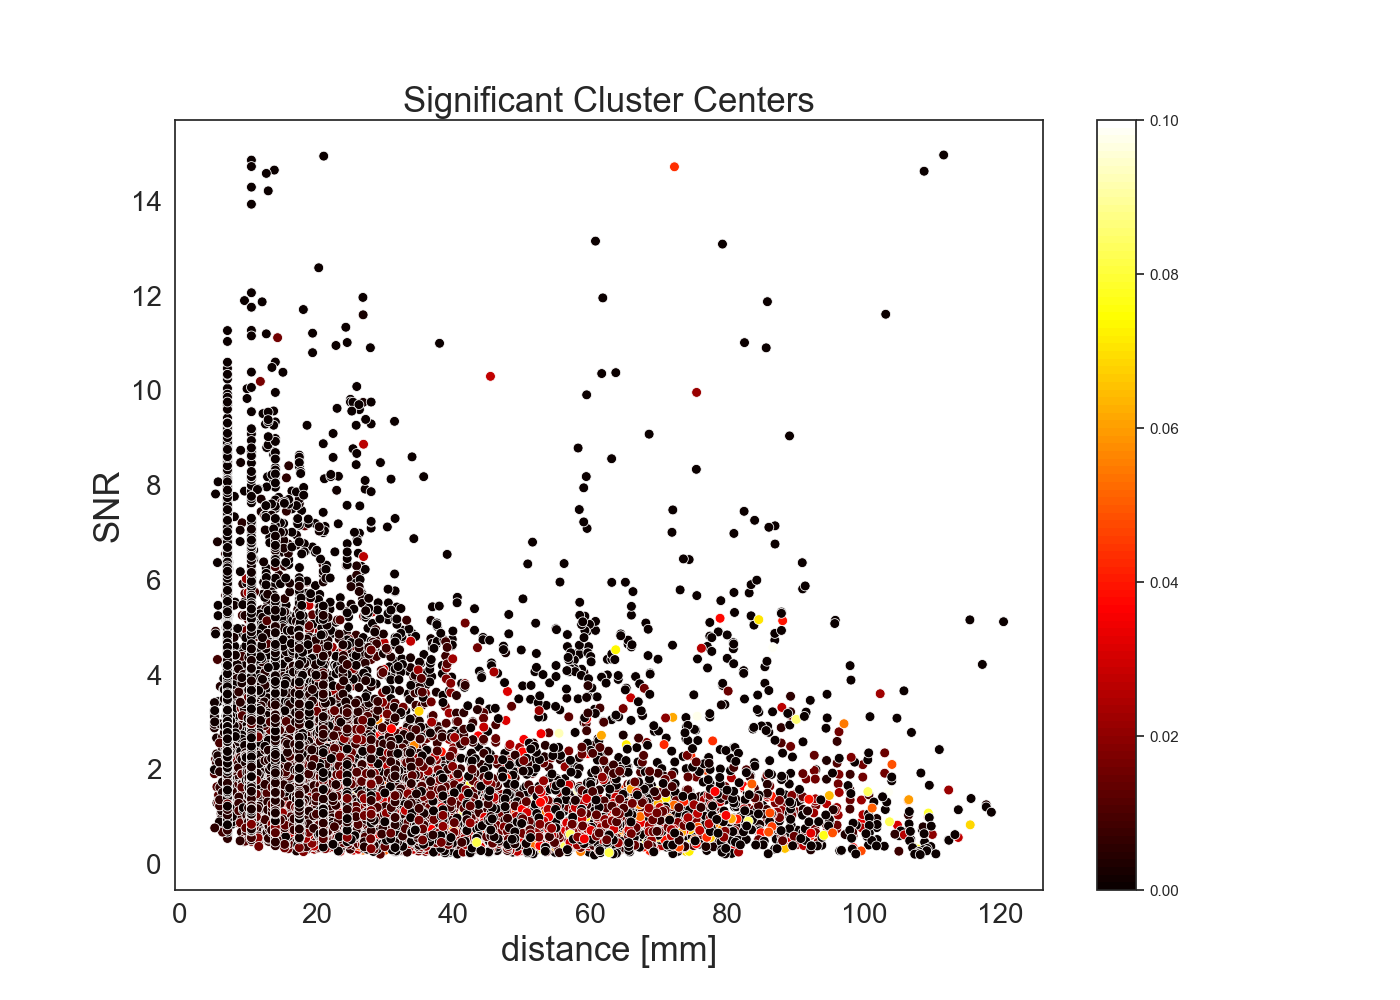

Text(0, 0.5, 'SNR')

In [131]:
yy = 'SNR'
colormap_d = cm.get_cmap('hot', n)
data_plot = CC_subjs[(CC_subjs.onset>-0.001)&(CC_subjs.onset<0.22)&(CC_subjs.SNR<15)&(CC_subjs.art==0)&(CC_subjs.sig_w==1)&(CC_subjs.d>5)]
norm = plt.Normalize(data_plot['onset'].min(), 0.1)
#sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)

fig = plt.figure(figsize=(14,10))
g = sns.scatterplot(x='d', y=yy, c=data_plot.onset, s=50,data= data_plot, cmap =colormap_d)
scalarmappaple = cm.ScalarMappable(norm=norm, cmap=colormap_d)
fig.colorbar(scalarmappaple)
plt.title('Significant Cluster Centers', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('distance [mm]', fontsize=25)
plt.ylabel(yy[:3], fontsize=25)

Text(0, 0.5, 'SNR')

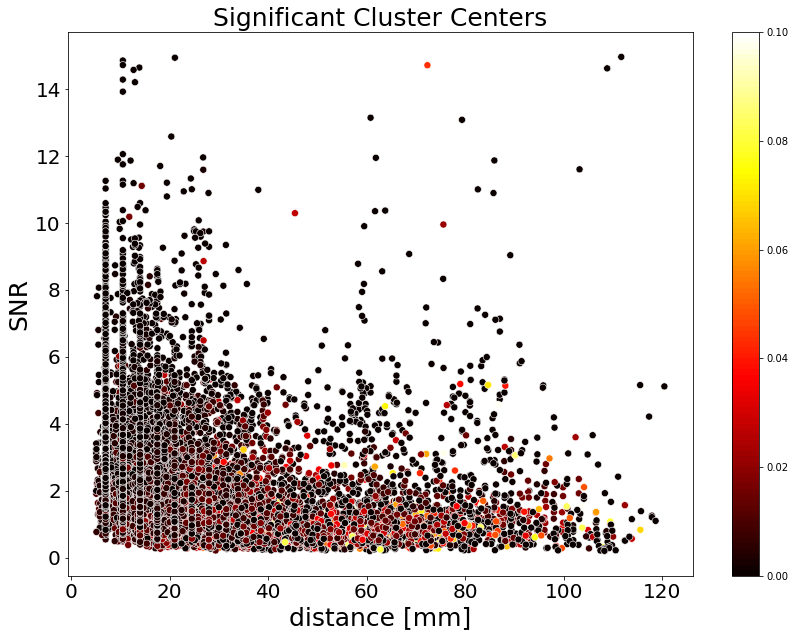

In [43]:
yy = 'SNR'
colormap_d = cm.get_cmap('hot', n)
data_plot = CC_subjs[(CC_subjs.onset>-0.001)&(CC_subjs.onset<0.22)&(CC_subjs.SNR<15)&(CC_subjs.art==0)&(CC_subjs.sig_w==1)&(CC_subjs.d>5)]
norm = plt.Normalize(data_plot['onset'].min(), 0.1)
#sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)

fig = plt.figure(figsize=(14,10))
g = sns.scatterplot(x='d', y=yy, c=data_plot.onset, s=50,data= data_plot, cmap =colormap_d)
scalarmappaple = cm.ScalarMappable(norm=norm, cmap=colormap_d)
fig.colorbar(scalarmappaple)
plt.title('Significant Cluster Centers', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('distance [mm]', fontsize=25)
plt.ylabel(yy[:3], fontsize=25)

<AxesSubplot:xlabel='d', ylabel='SNR'>

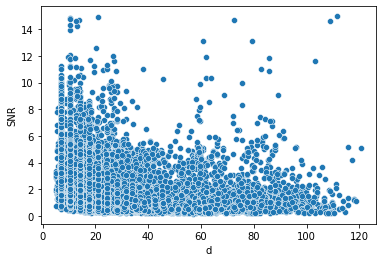

In [34]:
sns.scatterplot(x='d', y='SNR', data =CC_subjs[(CC_subjs.SNR<15)&(CC_subjs.art==0)&(CC_subjs.sig_w==1)&(CC_subjs.d>5)],  )


### example of one patient

In [ ]:
file_CC_summ = path_patient_analysis + '\\' + folder + '\\data\\CC_summ.csv'

In [472]:
subj = subjs[1]
print('loading -- '+subj, end='\r')
path_gen = os.path.join(sub_path+'Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment'
path_infos = os.path.join(path_patient, 'infos')
if not os.path.exists(path_infos):
    path_infos = path_gen + '\\infos'
path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj
files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*')
stimlist = pd.read_csv(files_list[0])
lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)

file_t_resp = path_patient_analysis + '\\' + folder + '\\data\\M_tresp.npy'  # for each connection: LLsig (old), t_onset (old), t_resp, CC_p, CC_LL1, CC_LL2
file_CC_surr = path_patient_analysis + '\\' + folder + '\\data\\M_CC_surr.csv'

file_GT = path_patient_analysis + '\\' + folder + '\\data\\M_CC.npy'

M_GT_all = np.load(file_GT)
M_t_resp = np.load(file_t_resp)
surr_thr = pd.read_csv(file_CC_surr)

In [54]:
titles = ['Mean', 'CC1', 'CC2']




In [55]:
from scipy.misc import derivative
from scipy.ndimage.filters import uniform_filter1d

In [ ]:
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
data_convolved = np.convolve(data, kernel, mode='same')

In [ ]:
w_LL_onset = 0.1
w = 0.25
w_s = 0.1
t_0 = 1
x_ax_LL = x_ax+w/2
x_ax_LL_onset = x_ax+w_LL_onset/2
dx = 1

fs_labels = 15
fs_ticks = 8

In [473]:
subj = 'EL011'

In [234]:
chan_pairs = CC_subjs.loc[(CC_subjs.art==1)&(CC_subjs.Subj==subj), ['Stim', 'Chan']].values

In [357]:
chan_pairs = CC_subjs.loc[(CC_subjs.sig==1)&(CC_subjs.sig_w==0)&(CC_subjs.Subj==subj), ['Stim', 'Chan']].values
k = -1

In [263]:
sg_filter = 2

<IPython.core.display.Javascript object>


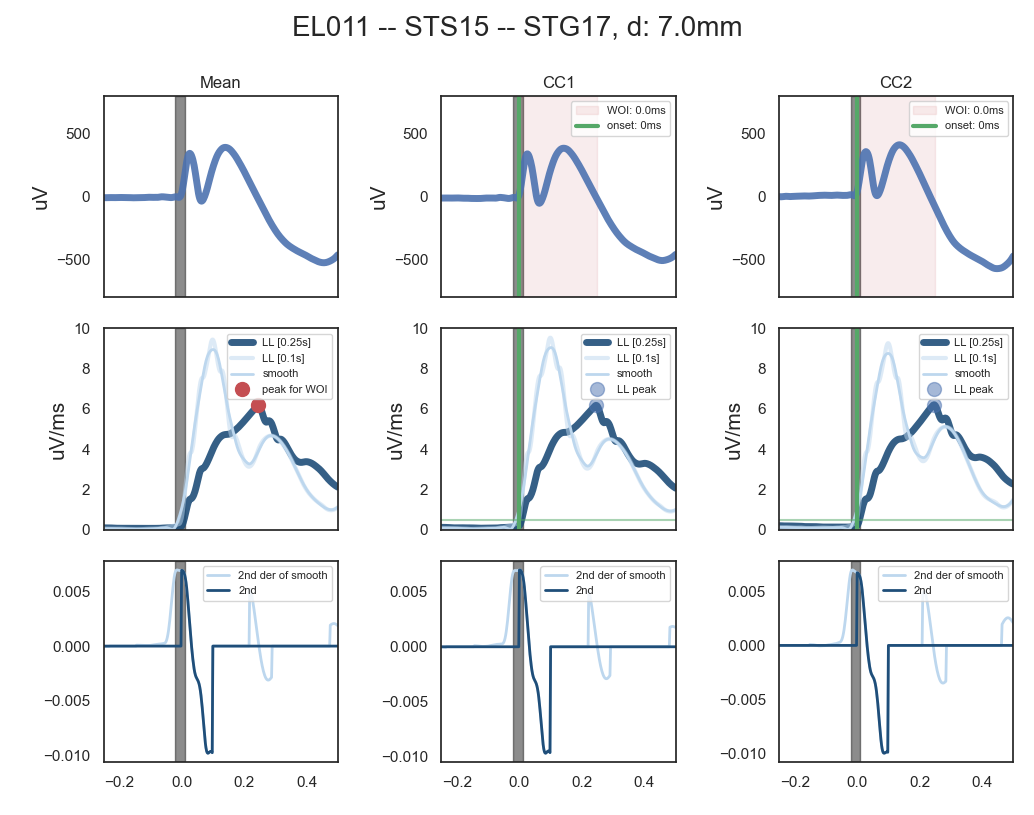

In [479]:
k = k+1
sc = 14# int(chan_pairs[k,0])
rc = 16# int(chan_pairs[k,1])


LL_CC = LLf.get_LL_all(np.expand_dims(M_GT_all[sc,rc, :], 0), Fs, 0.25)[0]

LL_CC_onset = LLf.get_LL_all(np.expand_dims(ff.lp_filter(M_GT_all[sc,rc, :],30,Fs), 0), Fs, w_LL_onset)[0]

WOI = M_t_resp[sc, rc,2]
thr = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL95'].values[0]
thr50 = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL50'].values[0]
thr50 = thr50 +(thr-thr50)/2

d = np.round(distance.euclidean(coord_all[sc], coord_all[rc]), 2) 

fig = plt.figure(figsize=(9,7))
fig.patch.set_facecolor('xkcd:white')
sns.set(style='white')
plt.suptitle(subj +' -- ' + labels_all[sc] + ' -- ' + labels_all[rc]+', d: '+str(d)+'mm', fontsize=20)
ylim = 800
ylim_LL = ylim/80
xlim = [-0.25,0.5]    
gs = fig.add_gridspec(3,3)  # GridSpec(4,1, height_ratios=[1,2,1,2])
for i in range(3):    
    dy_y = scipy.signal.savgol_filter(LL_CC_onset[i], smooth_win, sg_filter, 0)
    d1_LL = scipy.signal.savgol_filter(LL_CC_onset[i], smooth_win, sg_filter, 1)
    d2_LL = scipy.signal.savgol_filter(LL_CC_onset[i], smooth_win, sg_filter, 2)
    d2_LL[d1_LL<0] = 0
    
    
    ####derivative
    fig.add_subplot(gs[2, i])
    plt.plot(x_ax_LL_onset, d2_LL, linewidth=2, color=color_elab[1],label='2nd der of smooth')
    d2_LL[int((t_0+WOI+w_LL_onset/2)*Fs):] = 0
    d2_LL[:int((t_0-w_LL_onset/2)*Fs)] = 0
    plt.plot(x_ax_LL_onset, d2_LL, linewidth=2, color=color_elab[0],label='2nd')    
    plt.xlim(xlim)
    #plt.ylim([-0.1,])
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.legend(fontsize= fs_ticks)
    
    fig.add_subplot(gs[1, i])
    plt.plot(x_ax_LL, LL_CC[i], color=color_elab[0], linewidth = 5, alpha=0.9, label='LL [0.25s]')
    plt.plot(x_ax_LL_onset, LL_CC_onset[i], color=color_elab[1],linewidth = 3, alpha=0.5, label='LL ['+str(w_LL_onset)+'s]')
    plt.plot(x_ax_LL_onset, dy_y, color=color_elab[1],linewidth = 2, alpha=1, label='smooth')
    plt.xlim(xlim)
    plt.ylim(0, ylim_LL)
    plt.ylabel('uV/ms', fontsize= fs_labels)
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    
    if i>0:
        t_onset = -1
        plt.axhline(thr, color='g', alpha=0.5)
        # plt.axhline(thr50, ls='--', color='g', alpha=0.5)
        pk_WOI = LL_CC[i,int((t_0 + WOI+w/2) * Fs)]
        
        LL_t_pk = np.array(LL_CC[i] >= thr50) * 1
        LL_t_pk[:int((t_0-w/2)*Fs)] = 0
        LL_t_pk[int((t_0 + WOI+3*w/2) * Fs):] = 0
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w) * Fs),)))
        
        if (len(t_pk) > 0):
            
            t_onset = np.argmax(d2_LL)
            
            t_onset = t_onset/Fs-t_0
            t_onset = t_onset + w_LL_onset / 2#+w_s/2
            if t_onset < 0:
                t_onset = 0
            # plt.plot(t_onset+ w / 2,LL_CC[i,int(t_resp_all[0])], 'go', markersize=10, label = 'onset = '+str(np.round((t_onset+ w / 2)*1000,2))+'ms')
            plt.axvline(t_onset, linewidth=3, color='g')
        
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'bo', label = 'LL peak', markersize=10, alpha= 0.5)    
        # plt.plot(WOI+w,pk_WOI, 'ro', label = 'LL of WOI', markersize=10)
        
        # artefact:
        LL_t_pk = np.array(LL_CC[i] >= 3*thr) * 1
        LL_t_pk[int((t_0)*Fs):] = 0
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w/3*2) * Fs),)))
        art_thr = np.mean(LL_CC[i,int((t_0-0.25)*Fs):int((t_0)*Fs)])+3*np.std(LL_CC[i,int((t_0-0.25)*Fs):int((t_0)*Fs)])
        if (len(t_pk) > 0) & (pk_WOI<art_thr):
            plt.text(-0.25, ylim_LL/2, 'ARTEFACT')
    else:
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'ro', label = 'peak for WOI', markersize=10)
        WOI2 = pk_ts/Fs - w/2 # should be the same as WOI
    plt.legend(fontsize= fs_ticks)
    plt.xticks([])
    
   
    
    ###EEG
    fig.add_subplot(gs[0, i])
    plt.title(titles[i])
    plt.plot(x_ax, M_GT_all[sc,rc,i], linewidth = 5, alpha=0.9)
    plt.xlim(xlim)
    plt.ylim(-ylim, ylim)
    plt.ylabel('uV', fontsize= fs_labels)
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.xticks([])
    if i>0:
        plt.axvspan(WOI, WOI+0.25, color='r', alpha=0.1, label ='WOI: '+str(np.round(WOI*1000,2))+'ms')
        plt.axvline(t_onset, linewidth=3, color='g', label='onset: '+str(np.round(1000*(t_onset),2))+'ms')
        plt.legend(fontsize= fs_ticks)
plt.tight_layout()
#plt.savefig(os.path.join(path_patient_analysis,folder, 'response_onset', labels_all[sc]+'_'+labels_all[rc]+'_SG.svg'))

<IPython.core.display.Javascript object>


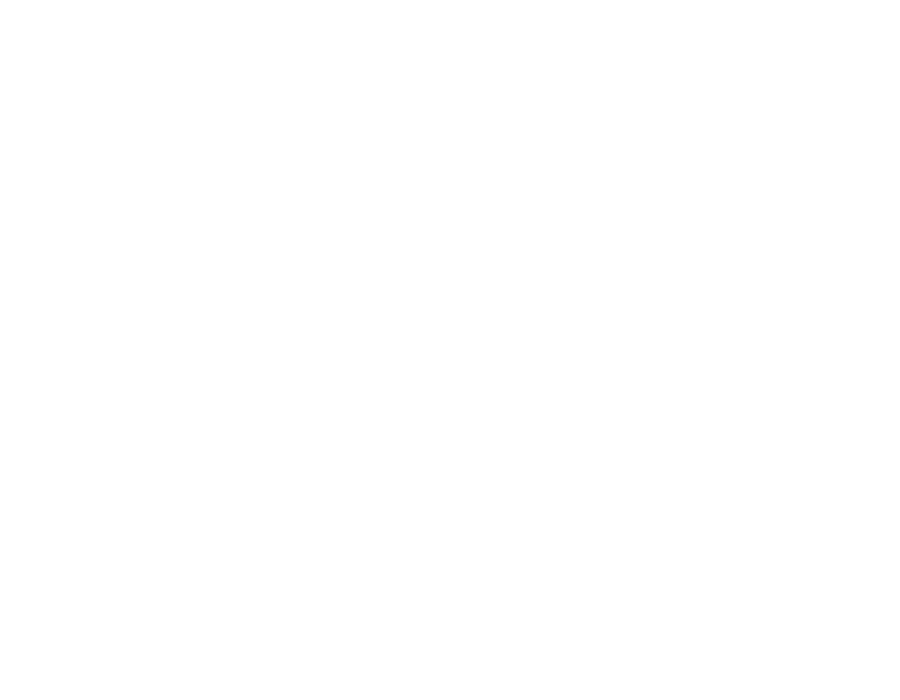

<IPython.core.display.Javascript object>


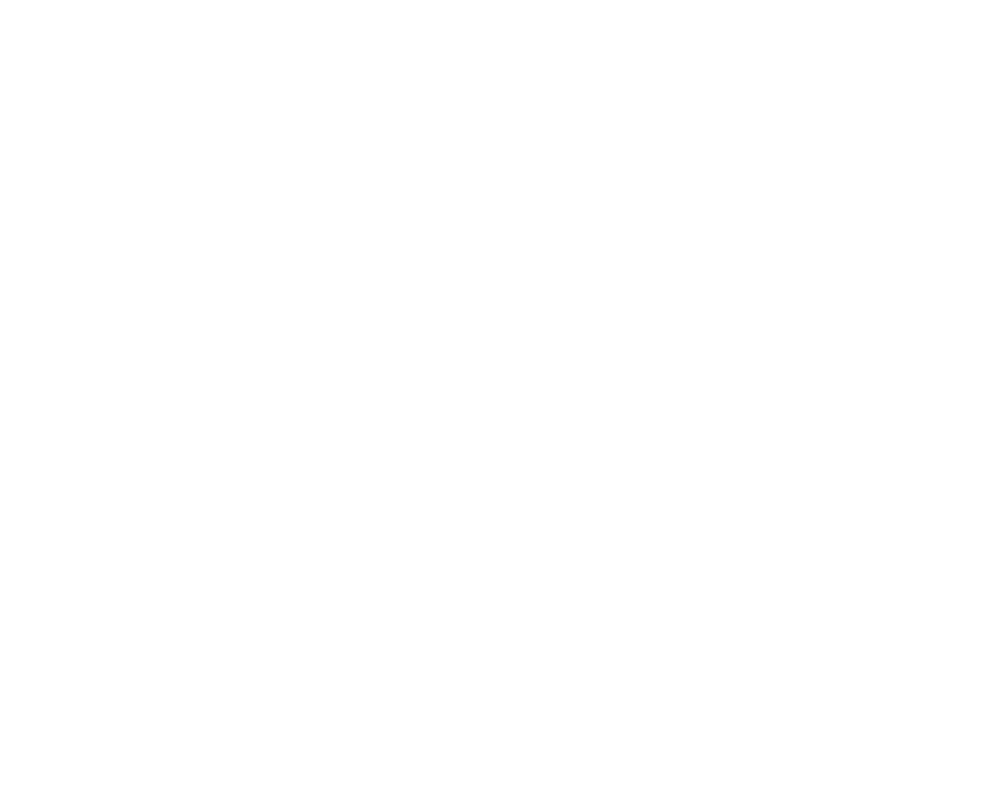

In [203]:
%matplotlib notebook
plt.ion() 
sc = 48
rc = 36


w_LL_onset = 0.1
w = 0.25
w_s = 0.1
t_0 = 1
x_ax_LL = x_ax+w/2
x_ax_LL_onset = x_ax+w_LL_onset/2
dx = 1

fs_labels = 15
fs_ticks = 8

LL_CC = LLf.get_LL_all(np.expand_dims(M_GT_all[sc,rc, :], 0), Fs, 0.25)[0]

LL_CC_onset = LLf.get_LL_all(np.expand_dims(ff.lp_filter(M_GT_all[sc,rc, :],45,Fs), 0), Fs, w_LL_onset)[0]

WOI = M_t_resp[sc, rc,2]
thr = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL95'].values[0]
thr50 = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL50'].values[0]

d = np.round(distance.euclidean(coord_all[sc], coord_all[rc]), 2) 

fig = plt.figure(figsize=(9,7))
fig.patch.set_facecolor('xkcd:white')
sns.set(style='white')
plt.suptitle(subj +' -- ' + labels_all[sc] + ' -- ' + labels_all[rc]+', d: '+str(d)+'mm', fontsize=20)
ylim = 1000
ylim_LL = ylim/80
xlim = [-0.25,0.5]    
gs = fig.add_gridspec(3,3)  # GridSpec(4,1, height_ratios=[1,2,1,2])
for i in range(3):    
    dy_y = scipy.signal.savgol_filter(LL_CC_onset[i], int(1+0.1*Fs), 2, 0)
    d1_LL = scipy.signal.savgol_filter(LL_CC_onset[i], int(1+0.1*Fs), 2, 1)
    d2_LL = scipy.signal.savgol_filter(LL_CC_onset[i], int(1+0.1*Fs), 2, 2)
    d2_LL[d1_LL<0] = 0
    
    
    ####derivative
    fig.add_subplot(gs[2, i])
    plt.plot(x_ax_LL_onset, d2_LL, linewidth=2, color=color_elab[1],label='2nd der of smooth')
    d2_LL[int((t_0+WOI+w/2)*Fs):] = 0
    d2_LL[:int((t_0-w_LL_onset/2)*Fs)] = 0
    plt.plot(x_ax_LL_onset, d2_LL, linewidth=2, color=color_elab[0],label='2nd')    
    plt.xlim(xlim)
    #plt.ylim([-0.1,])
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.legend(fontsize= fs_ticks)
    
    fig.add_subplot(gs[1, i])
    plt.plot(x_ax_LL, LL_CC[i], color=color_elab[0], linewidth = 5, alpha=0.9, label='LL [0.25s]')
    plt.plot(x_ax_LL_onset, LL_CC_onset[i], color=color_elab[1],linewidth = 3, alpha=0.5, label='LL ['+str(w_LL_onset)+'s]')
    plt.plot(x_ax_LL_onset, dy_y, color=color_elab[1],linewidth = 2, alpha=1, label='smooth')
    plt.xlim(xlim)
    plt.ylim(0, ylim_LL)
    plt.ylabel('uV/ms', fontsize= fs_labels)
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    
    if i>0:
        t_onset = -1
        plt.axhline(thr, color='g', alpha=0.5)
        # plt.axhline(thr50, ls='--', color='g', alpha=0.5)
        pk_WOI = LL_CC[i,int((t_0 + WOI+w/2) * Fs)]
        
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[:int((t_0-w/2)*Fs)] = 0
        LL_t_pk[int((t_0+0.6)*Fs):] = 0
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w) * Fs),)))
        
        if (len(t_pk) > 0):
            # t_onset = t_resp_all[0] / Fs - t_0
           # peaks_all, properties = scipy.signal.find_peaks(d2_LL, prominence=0.001, width = 1)  #
           # if len(peaks_all) > 0:
           #     if len(peaks_all) > 1:
           #         ix = 0 # np.argsort(properties["prominences"])[-1]
           #         t_onset = peaks_all[ix]
           #     else:
           #         t_onset = peaks_all[0]
           # else:
           #     t_onset = np.argmax(dy2)
                
            # peaks_all, properties = scipy.signal.find_peaks(d_LL2, prominence=0.001, width = 1)  #
            # peaks_all = peaks_all[peaks_all>t_onset]
            # ix = np.argmin(abs(peaks_all-t_onset))
            # t_onset = peaks_all[ix]
            #
            #d_LL2[:t_onset-int(0.005*Fs)] = 0
            #d_LL2[t_onset+int(0.05*Fs):] = 0
            
            t_onset = np.argmax(d2_LL)
            
            t_onset = t_onset/Fs-t_0
            t_onset = t_onset + w_LL_onset / 2#+w_s/2
            if t_onset < 0: 
                print(t_onset)
                t_onset = 0
            # plt.plot(t_onset+ w / 2,LL_CC[i,int(t_resp_all[0])], 'go', markersize=10, label = 'onset = '+str(np.round((t_onset+ w / 2)*1000,2))+'ms')
            plt.axvline(t_onset, linewidth=3, color='g')
        
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'bo', label = 'LL peak', markersize=10, alpha= 0.5)    
        # plt.plot(WOI+w,pk_WOI, 'ro', label = 'LL of WOI', markersize=10)
        
        # artefact:
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[int((t_0)*Fs):] = 0
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w/3*2) * Fs),)))
        #if (len(t_pk) > 0):
        #    plt.text(-0.25, ylim_LL/2, 'ARTEFACT')
    else:
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'ro', label = 'peak for WOI', markersize=10)
        WOI2 = pk_ts/Fs - w/2 # should be the same as WOI
    plt.legend(fontsize= fs_ticks)
    plt.xticks([])
    
   
    
    ###EEG
    fig.add_subplot(gs[0, i])
    plt.title(titles[i])
    plt.plot(x_ax, M_GT_all[sc,rc,i], linewidth = 5, alpha=0.9)
    plt.xlim(xlim)
    plt.ylim(-ylim, ylim)
    plt.ylabel('uV', fontsize= fs_labels)
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.xticks([])
    if i>0:
        plt.axvspan(WOI, WOI+0.25, color='r', alpha=0.1, label ='WOI: '+str(np.round(WOI*1000,2))+'ms')
        plt.axvline(t_onset, linewidth=3, color='g', label='onset: '+str(np.round(1000*(t_onset),2))+'ms')
        plt.legend(fontsize= fs_ticks)
plt.tight_layout()
plt.savefig(os.path.join(path_patient_analysis,folder, 'response_onset', labels_all[sc]+'_'+labels_all[rc]+'_SG.jpg'))
plt.close()

fig = plt.figure(figsize=(10,8))
fig.patch.set_facecolor('xkcd:white')
sns.set(style='white')
plt.suptitle(subj +' -- ' + labels_all[sc] + ' -- ' + labels_all[rc]+', d: '+str(d)+'mm', fontsize=30)
ylim = 800
ylim_LL = ylim/80
xlim = [-0.25,0.5]    
gs = fig.add_gridspec(3,3)  # GridSpec(4,1, height_ratios=[1,2,1,2])
for i in range(3):    
    
   
    
    d_y  = ff.lp_filter(LL_CC_onset[i],5,Fs)# uniform_filter1d(LL_CC_onset[i],int(w_s*Fs)) # ff.lp_filter(LL_CC[i], 40,Fs)
    dy = np.diff(d_y)/dx
    dy2 = np.diff(dy)/dx
    dy2 = dy2*20*(dy[:-1]>0)
    
    
    d_LL  = LL_CC_onset[i]# uniform_filter1d(LL_CC_onset[i],int(w_s*Fs)) # ff.lp_filter(LL_CC[i], 40,Fs)
    d_LL = np.diff(d_LL)/dx
    d_LL2 = np.diff(d_LL)/dx
    d_LL2 = d_LL2*5*(d_LL[:-1]>0)
    
    
     ####derivative
    fig.add_subplot(gs[2, i])
    
    
    #plt.plot(x_ax_LL[1:], dy, label='1st der')
    plt.plot(x_ax_LL_onset[2:], d_LL2, linewidth=3,alpha=0.5, color=color_elab[1],label='2nd der')
    plt.plot(x_ax_LL_onset[2:], dy2, linewidth=2, color=color_elab[1],label='2nd der of smooth')
    plt.xlim(xlim)
    #plt.ylim([-0.1,])
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.legend()
    pk = np.argmax(dy2)+(w_LL_onset/2)*Fs
    pk = pk
    pk=pk/Fs-t_0
    plt.ylim([-0.1,ylim_LL/40])

    dy2[:int((t_0-w_LL_onset/2)*Fs)-2] = 0
    dy2[int((t_0+WOI+w/2)*Fs)-2:] = 0
    d_LL2[:int((t_0-w_LL_onset/2)*Fs)-2] = 0
    d_LL2[int((t_0+WOI+w/2)*Fs)-2:] = 0
    
    fig.add_subplot(gs[1, i])
    plt.plot(x_ax_LL, LL_CC[i], color=color_elab[0], linewidth = 5, alpha=0.9, label='LL [0.25s]')
    plt.plot(x_ax_LL_onset, LL_CC_onset[i], color=color_elab[1],linewidth = 3, alpha=0.5, label='LL ['+str(w_LL_onset)+'s]')
    plt.plot(x_ax_LL_onset, d_y, color=color_elab[1],linewidth = 2, alpha=1, label='smooth')
    plt.xlim(xlim)
    plt.ylim(0, ylim_LL)
    plt.ylabel('uV/ms')
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    # plt.xticks([-0.5, 0,1, 2])
    
    
    
    # plt.axvspan(WOI+0.125, WOI+0.125+0.25, color='k', alpha=0.1)
    if i>0:
        t_onset = -1
        plt.axhline(thr, color='g', alpha=0.5)
        # plt.axhline(thr50, ls='--', color='g', alpha=0.5)
        pk_WOI = LL_CC[i,int((t_0 + WOI+w/2) * Fs)]
        # LL_t = np.array(LL_CC[i] >= thr50) * 1
        # LL_t[:int((t_0-w/2)*Fs)] = 0
        # LL_t[int((t_0+0.4+w/2)*Fs):] = 0
        #   
        # #LL_CC[i, int((WOI+t_0)*Fs):int((WOI+t_0+)*Fs)]
        # # plt.plot(x_ax_LL, LL_t*2)
        # t_resp_all = sf.search_sequence_numpy(LL_t, np.ones((int((3/2*w) * Fs),)))
        
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[:int((t_0-w/2)*Fs)] = 0
        LL_t_pk[int((t_0+0.6)*Fs):] = 0
          
        #LL_CC[i, int((WOI+t_0)*Fs):int((WOI+t_0+)*Fs)]
        # plt.plot(x_ax_LL, LL_t*2)
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w) * Fs),)))
        
        if (len(t_pk) > 0):
            # t_onset = t_resp_all[0] / Fs - t_0
            
            peaks_all, properties = scipy.signal.find_peaks(dy2, prominence=0.001, width = 1)  #
            if len(peaks_all) > 0:
                if len(peaks_all) > 1:
                    ix = 0 # np.argsort(properties["prominences"])[-1]
                    t_onset = peaks_all[ix]
                else:
                    t_onset = peaks_all[0]
            else:
                t_onset = np.argmax(dy2)
                
            # peaks_all, properties = scipy.signal.find_peaks(d_LL2, prominence=0.001, width = 1)  #
            # peaks_all = peaks_all[peaks_all>t_onset]
            # ix = np.argmin(abs(peaks_all-t_onset))
            # t_onset = peaks_all[ix]
            
            d_LL2[:t_onset-int(0.005*Fs)] = 0
            d_LL2[t_onset+int(0.05*Fs):] = 0
            t_onset = np.argmax(d_LL2)
            
            t_onset = t_onset/Fs-t_0
            t_onset = t_onset + w_LL_onset / 2#+w_s/2
            if t_onset < 0: 
                print(t_onset)
                t_onset = 0
            # plt.plot(t_onset+ w / 2,LL_CC[i,int(t_resp_all[0])], 'go', markersize=10, label = 'onset = '+str(np.round((t_onset+ w / 2)*1000,2))+'ms')
            plt.axvline(t_onset, linewidth=3, color='g')
        
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'bo', label = 'LL peak', markersize=10, alpha= 0.5)    
        # plt.plot(WOI+w,pk_WOI, 'ro', label = 'LL of WOI', markersize=10)
        
        # artefact:
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[int((t_0)*Fs):] = 0
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w/3*2) * Fs),)))
        #if (len(t_pk) > 0):
        #    plt.text(-0.25, ylim_LL/2, 'ARTEFACT')
    else:
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'ro', label = 'peak for WOI', markersize=10)
        WOI2 = pk_ts/Fs - w/2 # should be the same as WOI
    #plt.legend()
    plt.xticks([])
    
   
    
    ###EEG
    fig.add_subplot(gs[0, i])
    plt.title(titles[i])
    plt.plot(x_ax, M_GT_all[sc,rc,i], linewidth = 5, alpha=0.9)
    plt.xlim(xlim)
    plt.ylim(-ylim, ylim)
    plt.ylabel('uV')
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.xticks([])
    if i>0:
        plt.axvspan(WOI, WOI+0.25, color='r', alpha=0.1, label ='WOI: '+str(np.round(WOI*1000,2))+'ms')
        plt.axvline(t_onset, linewidth=3, color='g', label='onset: '+str(np.round(1000*(t_onset),2))+'ms')
        plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(path_patient_analysis,folder, 'response_onset', labels_all[sc]+'_'+labels_all[rc]+'_BW.jpg'))
plt.close()

<IPython.core.display.Javascript object>


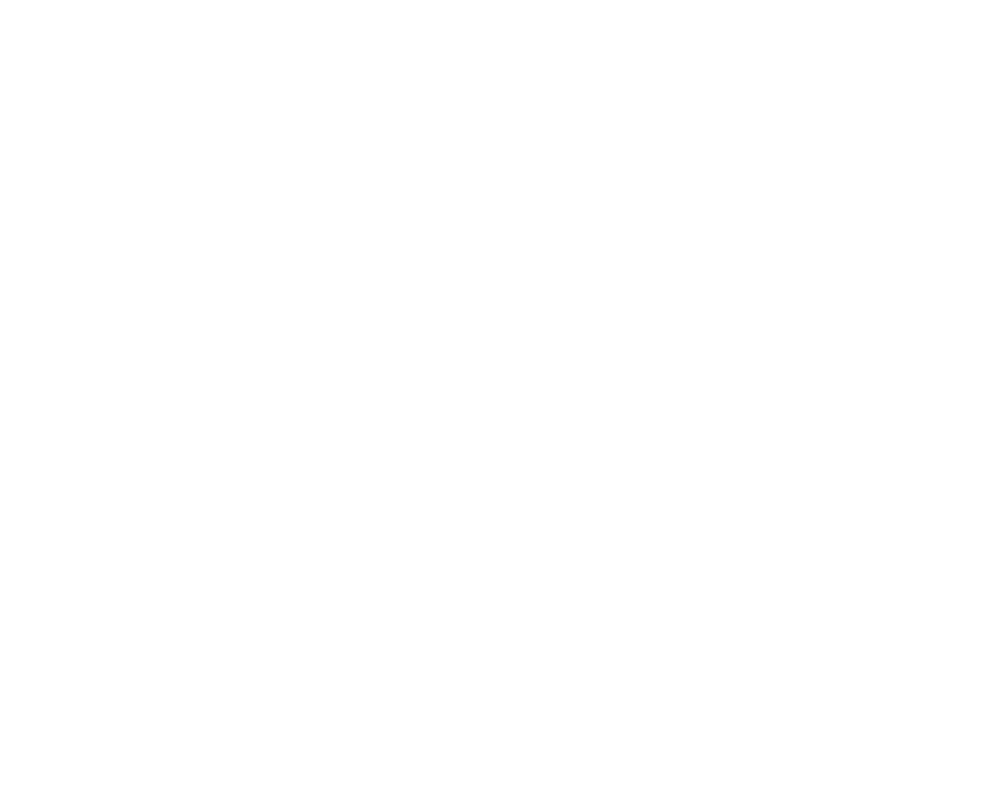

In [190]:
#%matplotlib notebook
plt.ion() 
sc = 2
rc = 0


w_LL_onset = 0.1
w = 0.25
w_s = 0.1
t_0 = 1
x_ax_LL = x_ax+w/2
x_ax_LL_onset = x_ax+w_LL_onset/2
dx = 1



LL_CC = LLf.get_LL_all(np.expand_dims(M_GT_all[sc,rc, :], 0), Fs, 0.25)[0]

LL_CC_onset = LLf.get_LL_all(np.expand_dims(ff.lp_filter(M_GT_all[sc,rc, :],45,Fs), 0), Fs, w_LL_onset)[0]

WOI = M_t_resp[sc, rc,2]
thr = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL95'].values[0]
thr50 = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL50'].values[0]

d = np.round(distance.euclidean(coord_all[sc], coord_all[rc]), 2) 

fig = plt.figure(figsize=(10,8))
fig.patch.set_facecolor('xkcd:white')
sns.set(style='white')
plt.suptitle(subj +' -- ' + labels_all[sc] + ' -- ' + labels_all[rc]+', d: '+str(d)+'mm', fontsize=30)
ylim = 800
ylim_LL = ylim/80
xlim = [-0.25,0.5]    
gs = fig.add_gridspec(3,3)  # GridSpec(4,1, height_ratios=[1,2,1,2])
for i in range(3):    
    
   
    
    d_y  = ff.lp_filter(LL_CC_onset[i],5,Fs)# uniform_filter1d(LL_CC_onset[i],int(w_s*Fs)) # ff.lp_filter(LL_CC[i], 40,Fs)
    dy = np.diff(d_y)/dx
    dy2 = np.diff(dy)/dx
    dy2 = dy2*20*(dy[:-1]>0)
    
    
    d_LL  = LL_CC_onset[i]# uniform_filter1d(LL_CC_onset[i],int(w_s*Fs)) # ff.lp_filter(LL_CC[i], 40,Fs)
    d_LL = np.diff(d_LL)/dx
    d_LL2 = np.diff(d_LL)/dx
    d_LL2 = d_LL2*5*(d_LL[:-1]>0)
    
    
     ####derivative
    fig.add_subplot(gs[2, i])
    
    
    #plt.plot(x_ax_LL[1:], dy, label='1st der')
    plt.plot(x_ax_LL_onset[2:], d_LL2, linewidth=3,alpha=0.5, color=color_elab[1],label='2nd der')
    plt.plot(x_ax_LL_onset[2:], dy2, linewidth=2, color=color_elab[1],label='2nd der of smooth')
    plt.xlim(xlim)
    #plt.ylim([-0.1,])
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.legend()
    pk = np.argmax(dy2)+(w_LL_onset/2)*Fs
    pk = pk
    pk=pk/Fs-t_0
    plt.ylim([-0.1,ylim_LL/40])

    dy2[:int((t_0-w_LL_onset/2)*Fs)-2] = 0
    dy2[int((t_0+WOI+w/2)*Fs)-2:] = 0
    d_LL2[:int((t_0-w_LL_onset/2)*Fs)-2] = 0
    d_LL2[int((t_0+WOI+w/2)*Fs)-2:] = 0
    
    fig.add_subplot(gs[1, i])
    plt.plot(x_ax_LL, LL_CC[i], color=color_elab[0], linewidth = 5, alpha=0.9, label='LL [0.25s]')
    plt.plot(x_ax_LL_onset, LL_CC_onset[i], color=color_elab[1],linewidth = 3, alpha=0.5, label='LL ['+str(w_LL_onset)+'s]')
    plt.plot(x_ax_LL_onset, d_y, color=color_elab[1],linewidth = 2, alpha=1, label='smooth')
    plt.xlim(xlim)
    plt.ylim(0, ylim_LL)
    plt.ylabel('uV/ms')
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    # plt.xticks([-0.5, 0,1, 2])
    
    
    
    # plt.axvspan(WOI+0.125, WOI+0.125+0.25, color='k', alpha=0.1)
    if i>0:
        t_onset = -1
        plt.axhline(thr, color='g', alpha=0.5)
        # plt.axhline(thr50, ls='--', color='g', alpha=0.5)
        pk_WOI = LL_CC[i,int((t_0 + WOI+w/2) * Fs)]
        # LL_t = np.array(LL_CC[i] >= thr50) * 1
        # LL_t[:int((t_0-w/2)*Fs)] = 0
        # LL_t[int((t_0+0.4+w/2)*Fs):] = 0
        #   
        # #LL_CC[i, int((WOI+t_0)*Fs):int((WOI+t_0+)*Fs)]
        # # plt.plot(x_ax_LL, LL_t*2)
        # t_resp_all = sf.search_sequence_numpy(LL_t, np.ones((int((3/2*w) * Fs),)))
        
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[:int((t_0-w/2)*Fs)] = 0
        LL_t_pk[int((t_0+0.6)*Fs):] = 0
          
        #LL_CC[i, int((WOI+t_0)*Fs):int((WOI+t_0+)*Fs)]
        # plt.plot(x_ax_LL, LL_t*2)
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w) * Fs),)))
        
        if (len(t_pk) > 0):
            # t_onset = t_resp_all[0] / Fs - t_0
            
            peaks_all, properties = scipy.signal.find_peaks(dy2, prominence=0.001, width = 1)  #
            if len(peaks_all) > 0:
                if len(peaks_all) > 1:
                    ix = 0 # np.argsort(properties["prominences"])[-1]
                    t_onset = peaks_all[ix]
                else:
                    t_onset = peaks_all[0]
            else:
                t_onset = np.argmax(dy2)
                
            # peaks_all, properties = scipy.signal.find_peaks(d_LL2, prominence=0.001, width = 1)  #
            # peaks_all = peaks_all[peaks_all>t_onset]
            # ix = np.argmin(abs(peaks_all-t_onset))
            # t_onset = peaks_all[ix]
            
            d_LL2[:t_onset-int(0.005*Fs)] = 0
            d_LL2[t_onset+int(0.05*Fs):] = 0
            t_onset = np.argmax(d_LL2)
            
            t_onset = t_onset/Fs-t_0
            t_onset = t_onset + w_LL_onset / 2#+w_s/2
            if t_onset < 0: 
                print(t_onset)
                t_onset = 0
            # plt.plot(t_onset+ w / 2,LL_CC[i,int(t_resp_all[0])], 'go', markersize=10, label = 'onset = '+str(np.round((t_onset+ w / 2)*1000,2))+'ms')
            plt.axvline(t_onset, linewidth=3, color='g')
        
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'bo', label = 'LL peak', markersize=10, alpha= 0.5)    
        # plt.plot(WOI+w,pk_WOI, 'ro', label = 'LL of WOI', markersize=10)
        
        # artefact:
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[int((t_0)*Fs):] = 0
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w/3*2) * Fs),)))
        #if (len(t_pk) > 0):
        #    plt.text(-0.25, ylim_LL/2, 'ARTEFACT')
    else:
        pk_ts = np.argmax(LL_CC[i, int(t_0*Fs):int((t_0+0.5-w/2)*Fs)])
        plt.plot(pk_ts/Fs+w/2,LL_CC[i,pk_ts+int((t_0)*Fs)], 'ro', label = 'peak for WOI', markersize=10)
        WOI2 = pk_ts/Fs - w/2 # should be the same as WOI
    #plt.legend()
    plt.xticks([])
    
   
    
    ###EEG
    fig.add_subplot(gs[0, i])
    plt.title(titles[i])
    plt.plot(x_ax, M_GT_all[sc,rc,i], linewidth = 5, alpha=0.9)
    plt.xlim(xlim)
    plt.ylim(-ylim, ylim)
    plt.ylabel('uV')
    plt.axvspan(-0.02, 0.01, color='k', alpha=0.5)
    plt.xticks([])
    if i>0:
        plt.axvspan(WOI, WOI+0.25, color='r', alpha=0.1, label ='WOI: '+str(np.round(WOI*1000,2))+'ms')
        plt.axvline(t_onset, linewidth=3, color='g', label='onset: '+str(np.round(1000*(t_onset),2))+'ms')
        plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(path_patient_analysis,folder, 'response_onset', labels_all[sc]+'_'+labels_all[rc]+'_BW.jpg'))
plt.close()

In [ ]:
w = 0.25

In [ ]:
t_0 = 1

In [ ]:
t_resp_all = sf.search_sequence_numpy(LL_t, np.ones((int((w + 0.08) * Fs),)))
if len(t_resp_all) > 0:
    t_onset = t_resp_all[0] / Fs - t_0 + w / 2

In [ ]:
t_onset

In [ ]:
print(M_t_resp.shape)

In [ ]:
print(M_t_resp.shape)

### plots to visualize relationships

In [ ]:
start = 1
sc = 2
rc = 0
d = np.round(distance.euclidean(coord_all[sc], coord_all[rc]), 2) 
LL_CC = LLf.get_LL_all(np.expand_dims(M_GT_all[sc,rc, :], 0), Fs, 0.25)[0]
WOI = M_t_resp[sc, rc,2]
if M_t_resp[sc, rc,0]>-1:
    thr = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL95'].values[0]
    thr50 = thr/2
    for i in range(1,3):
        t_onset = np.nan
        LL_WOI = LL_CC[i,int((t_0 + WOI+w/2) * Fs)]
        LL_t = np.array(LL_CC[i] >= thr) * 1
        LL_t[:int((t_0-w/2)*Fs)] = 0
        LL_t[int((t_0+0.4+w/2)*Fs):] = 0

        t_resp_all = sf.search_sequence_numpy(LL_t, np.ones((int((w) * Fs),)))
        if len(t_resp_all) > 0:
            t_onset = t_resp_all[0] / Fs - t_0 + w / 2
        LL_t_pk = np.array(LL_CC[i] >= thr) * 1
        LL_t_pk[:int((t_0-w/2)*Fs)] = 0
        LL_t_pk[int((t_0+0.4+w/2)*Fs):] = 0

        #LL_CC[i, int((WOI+t_0)*Fs):int((WOI+t_0+)*Fs)]
        # plt.plot(x_ax_LL, LL_t*2)
        t_pk = sf.search_sequence_numpy(LL_t_pk, np.ones((int((w) * Fs),)))

        LL_peak = np.max(LL_CC[i, int((t_0+w/2)*Fs):int((t_0+0.5-w/2)*Fs)])
        sig = np.array(LL_WOI>thr)*1
        sig_w = np.array((len(t_pk) > 0))*1
        arr = np.array([[sc, rc, i,LL_WOI, WOI,  LL_peak, t_onset, sig, sig_w, d]])
        arr = pd.DataFrame(arr, columns=['Stim', 'Chan', 'CC', 'LL_WOI', 't_WOI', 'LL_pk', 'onset', 'sig','sig_w', 'd'])
        if start:
            CC_summ = arr
            start = 0
        else:
            CC_summ = pd.concat([CC_summ,arr])
            CC_summ = CC_summ.reset_index(drop=True)

## across patients:

In [417]:
subjs = ['EL010', 'EL011', 'EL012', 'EL013', 'EL014', 'EL015', 'EL016', 'EL017']
start_subj = 1
for subj in subjs:
    print('loading -- '+subj, end='\r')
    path_gen = os.path.join(sub_path+'Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment'
    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'
    path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj
    files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*')
    stimlist = pd.read_csv(files_list[0])
    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)
    
    file_t_resp = path_patient_analysis + '\\' + folder + '\\data\\M_tresp.npy'  # for each connection: LLsig (old), t_onset (old), t_resp, CC_p, CC_LL1, CC_LL2
    file_CC_surr = path_patient_analysis + '\\' + folder + '\\data\\M_CC_surr.csv'
    file_CC_summ = path_patient_analysis + '\\' + folder + '\\data\\CC_summ.csv'
    file_GT = path_patient_analysis + '\\' + folder + '\\data\\M_CC.npy'

    CC_summ = pd.read_csv(file_CC_summ)

    if start_subj:
        CC_subjs = CC_summ
        start_subj = 0
    else:
        CC_subjs = pd.concat([CC_subjs,CC_summ])
        CC_subjs = CC_subjs.reset_index(drop=True)


In [419]:
CC_subjs = CC_subjs[(CC_subjs.sig_w==1)&(CC_subjs.art==0)]

CC_subjs= CC_subjs.reset_index(drop=True)
con_all = CC_subjs.groupby(['Subj','Stim', 'Chan'], as_index=False)[['onset', 'LL_WOI', 'SNR','d']].mean()

In [ ]:
data_plot = CC_subjs[(CC_subjs.d>3.5)&(CC_subjs.LL_WOI<40)&(CC_subjs.sig_w==1)]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('hot')
# Creating plot
sctt = ax.scatter3D(data_plot.d, data_plot.t_WOI, data_plot.LL_WOI,c =data_plot.LL_WOI, alpha = 0.8,cmap = 'hot',marker ='^')
plt.title("simple 3D scatter plot")
ax.set_xlabel('distance [mm]', fontweight ='bold')
ax.set_ylabel('onset [s]', fontweight ='bold')
ax.set_zlabel('LL [uV/ms]', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

In [434]:
con_all

Subj  Stim  Chan  onset    LL_WOI       SNR      d
0      EL010   0.0   2.0  0.000  7.294956  3.542084   7.00
1      EL010   0.0   6.0  0.000  1.431782  0.756335  21.00
2      EL010   0.0   7.0  0.000  3.106480  1.582183  24.50
3      EL010   0.0   9.0  0.000  0.896737  0.637959  55.76
4      EL010   0.0  25.0  0.000  2.492150  1.012657  73.60
...      ...   ...   ...    ...       ...       ...    ...
10579  EL017  59.0  49.0  0.000  2.774283  1.671404  35.00
10580  EL017  59.0  53.0  0.032  1.719754  0.884661  21.00
10581  EL017  59.0  54.0  0.005  1.327712  0.739326  17.50
10582  EL017  59.0  55.0  0.000  3.693991  2.230136  14.00
10583  EL017  59.0  57.0  0.003  7.897837  4.091950   7.00

[10584 rows x 7 columns]

In [436]:
con_all[con_all.SNR<6]

Subj  Stim  Chan  onset    LL_WOI       SNR      d
0      EL010   0.0   2.0  0.000  7.294956  3.542084   7.00
1      EL010   0.0   6.0  0.000  1.431782  0.756335  21.00
2      EL010   0.0   7.0  0.000  3.106480  1.582183  24.50
3      EL010   0.0   9.0  0.000  0.896737  0.637959  55.76
4      EL010   0.0  25.0  0.000  2.492150  1.012657  73.60
...      ...   ...   ...    ...       ...       ...    ...
10579  EL017  59.0  49.0  0.000  2.774283  1.671404  35.00
10580  EL017  59.0  53.0  0.032  1.719754  0.884661  21.00
10581  EL017  59.0  54.0  0.005  1.327712  0.739326  17.50
10582  EL017  59.0  55.0  0.000  3.693991  2.230136  14.00
10583  EL017  59.0  57.0  0.003  7.897837  4.091950   7.00

[10205 rows x 7 columns]

<IPython.core.display.Javascript object>


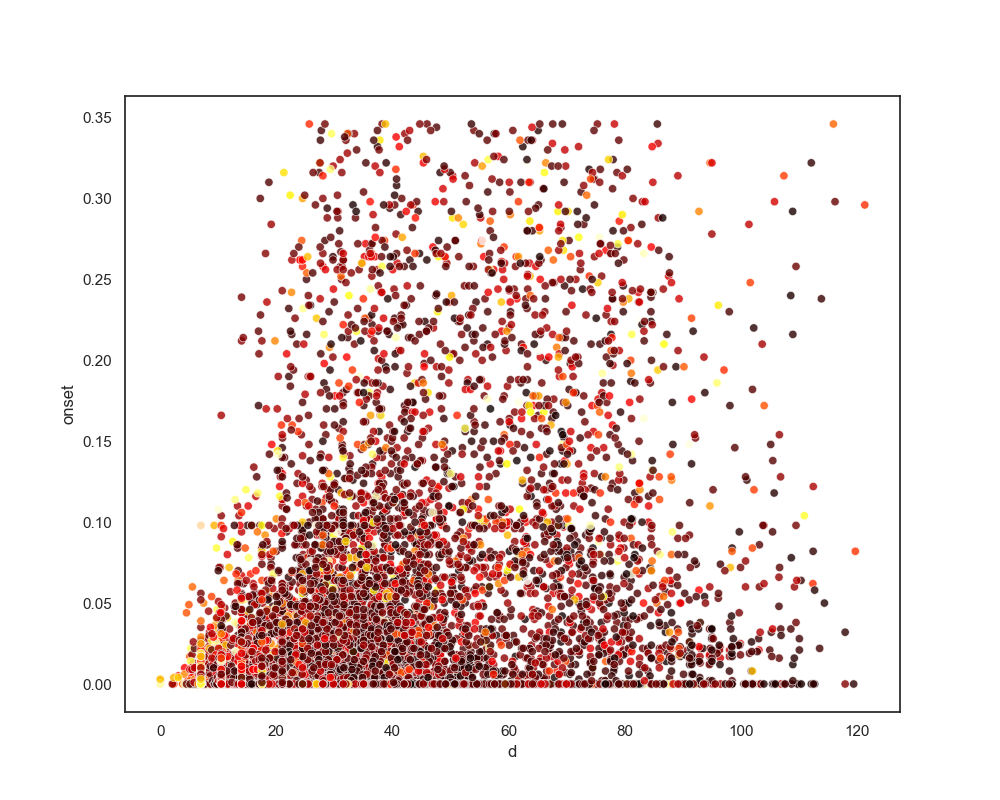

In [437]:
fig = plt.figure(figsize=(10,8))
fig.patch.set_facecolor('xkcd:white')
sns.set(style='white')
my_cmap = plt.get_cmap('hot')
sns.scatterplot(x='d', y='onset', c=con_all.loc[con_all.SNR<6, 'SNR'].values,data=con_all[con_all.SNR<6], alpha = 0.8,cmap =my_cmap)
plt.show()

In [ ]:
(x='d', y='onset', c=con_all.loc[con_all.SNR<6, 'SNR'].values,data=con_all[con_all.SNR<6], alpha = 0.8,cmap =my_cmap)

In [445]:
data_plot[['onset', 'd', 'SNR']].values.shape

(10205, 3)

In [446]:
X = data_plot[['onset', 'd', 'SNR']].values

In [449]:
import sklearn

In [485]:
clustering = sklearn.cluster.SpectralClustering(n_clusters=3).fit(X)
data_plot.insert(3, 'Spectral', clustering.labels_)

In [487]:
data_plot

Subj  Stim  Chan  Spectral  Birch  KMeans2  Ward  KMeans  onset  \
0      EL010   0.0   2.0         0      0        1     2       0  0.000   
1      EL010   0.0   6.0         0      0        1     1       0  0.000   
2      EL010   0.0   7.0         0      0        1     1       0  0.000   
3      EL010   0.0   9.0         0      1        2     0       2  0.000   
4      EL010   0.0  25.0         2      2        0     0       1  0.000   
...      ...   ...   ...       ...    ...      ...   ...     ...    ...   
10579  EL017  59.0  49.0         0      0        2     1       2  0.000   
10580  EL017  59.0  53.0         0      0        1     1       0  0.032   
10581  EL017  59.0  54.0         0      0        1     2       0  0.005   
10582  EL017  59.0  55.0         0      0        1     2       0  0.000   
10583  EL017  59.0  57.0         0      0        1     2       0  0.003   

         LL_WOI       SNR      d  
0      7.294956  3.542084   7.00  
1      1.431782  0.756335  21.00  
2      3.106480  1.582183  24.50  
3      0.896737  0.637959  55.76  
4      2.492150  1.012657  73.60  
...         ...       ...    ...  
10579  2.774283  1.671404  35.00  
10580  1.719754  0.884661  21.00  
10581  1.327712  0.739326  17.50  
10582  3.693991  2.230136  14.00  
10583  7.897837  4.091950   7.00  

[10205 rows x 12 columns]

In [489]:

clustering = sklearn.cluster.DBSCAN(eps=0.3, min_samples=10).fit(X)
data_plot.insert(3, 'DBSCAN', clustering.labels_)

In [480]:
clustering = sklearn.cluster.Birch(threshold=0.01, n_clusters=3).fit(X)
data_plot.insert(3, 'Birch', clustering.labels_)

In [462]:
clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(X)
#data_plot.insert(3, 'Ward', clustering.labels_)
data_plot.Ward= clustering.labels_

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [464]:
kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(X[:,:2])

In [465]:
data_plot.insert(3, 'KMeans2', kmeans.labels_)

<IPython.core.display.Javascript object>


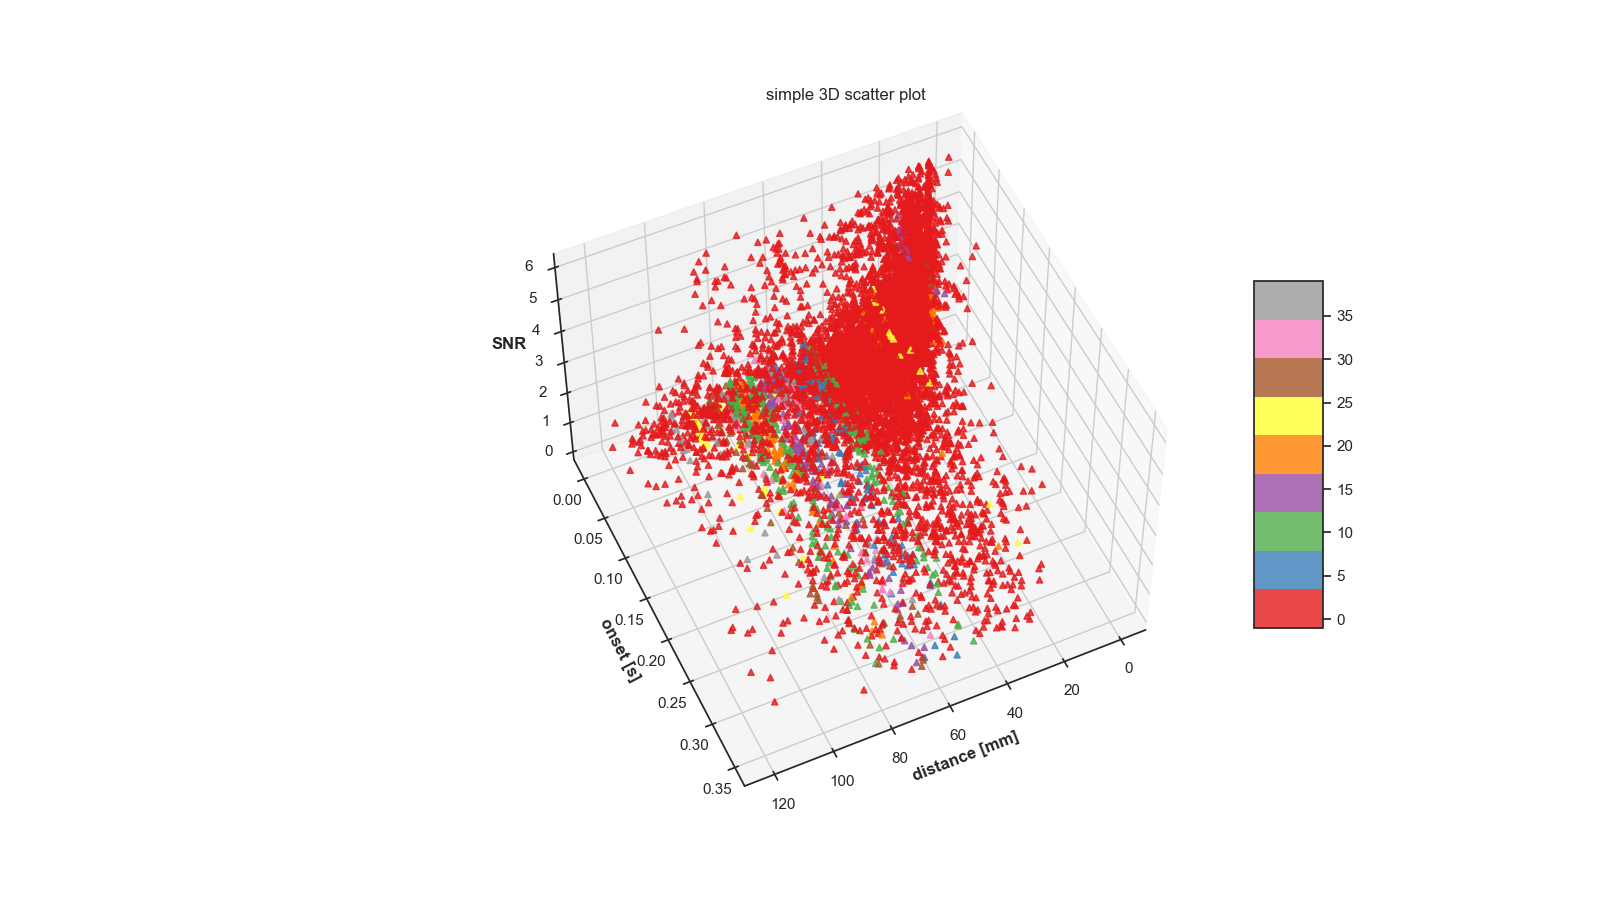

In [491]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")


sctt = ax.scatter3D(data_plot.d, data_plot.onset, data_plot.SNR,c =data_plot.DBSCAN, alpha = 0.8,cmap = 'Set1',marker ='^')
plt.title("simple 3D scatter plot")
ax.set_xlabel('distance [mm]', fontweight ='bold')
ax.set_ylabel('onset [s]', fontweight ='bold')
ax.set_zlabel('SNR', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

<IPython.core.display.Javascript object>


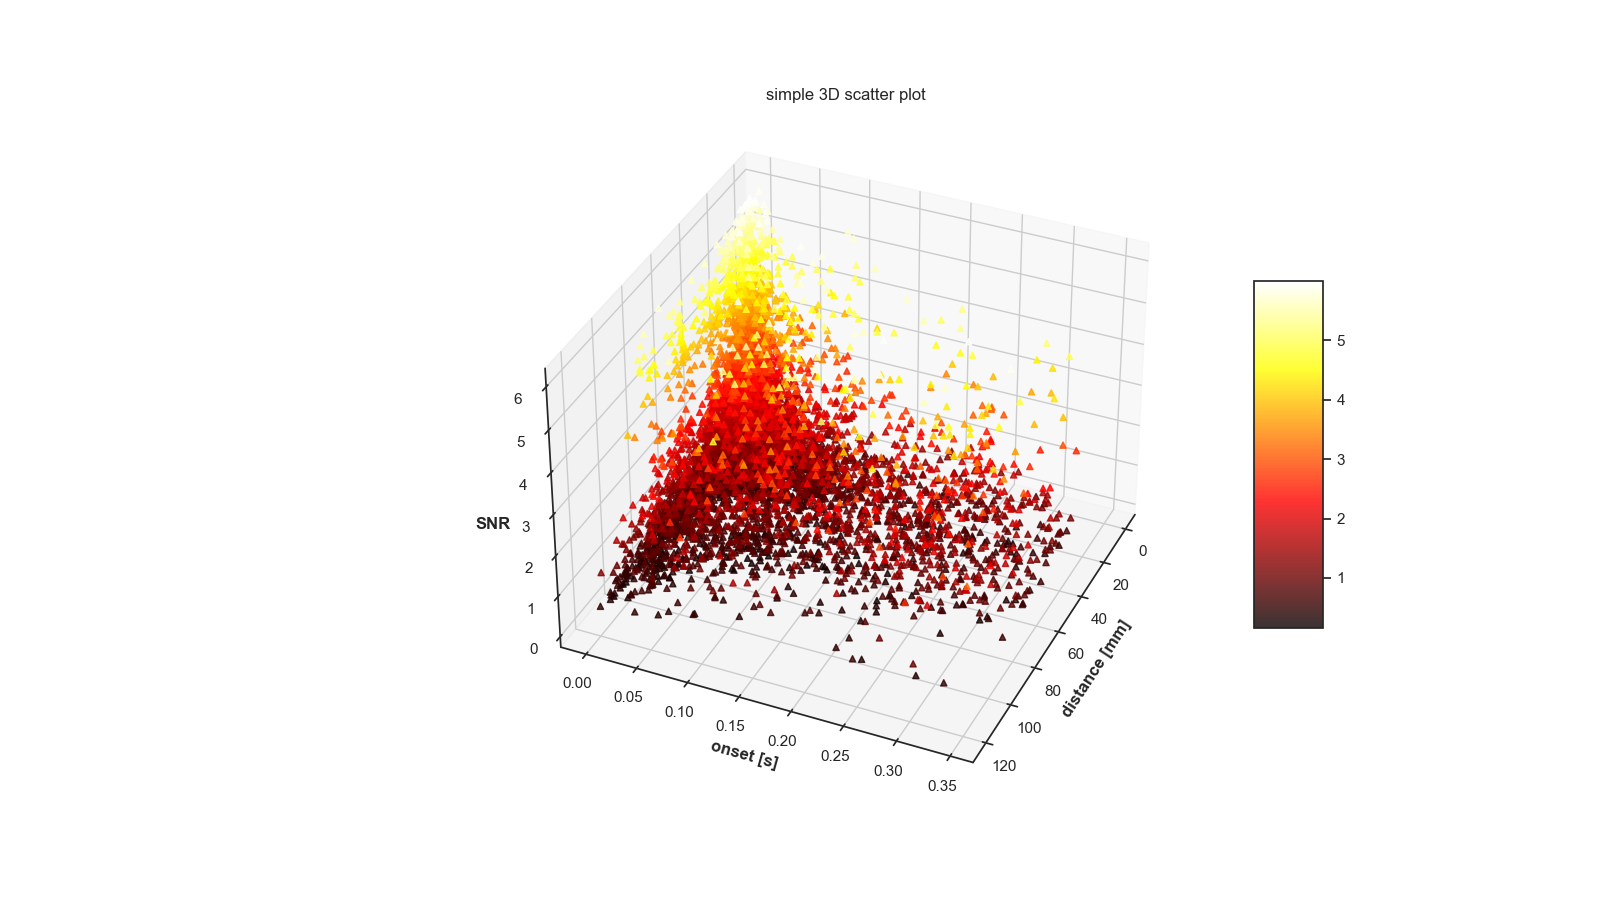

In [440]:
data_plot =con_all[con_all.SNR<6]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('hot')
# Creating plot
sctt = ax.scatter3D(data_plot.d, data_plot.onset, data_plot.SNR,c =data_plot.SNR, alpha = 0.8,cmap = 'hot',marker ='^')
plt.title("simple 3D scatter plot")
ax.set_xlabel('distance [mm]', fontweight ='bold')
ax.set_ylabel('onset [s]', fontweight ='bold')
ax.set_zlabel('SNR', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

In [438]:
from mpl_toolkits.mplot3d import axes3d

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = data_plot.d.values, data_plot.t_WOI.values, data_plot.LL_WOI.values
ax.scatter(X, Y,np.array([Z]), c= Z )

plt.show()

In [ ]:
data_plot = CC_subjs[(CC_subjs.d>3.5)&(CC_subjs.LL_WOI<40)&(CC_subjs.sig_w==1)]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('hot')
# Creating plot
sctt = ax.scatter3D(data_plot.d, data_plot.t_WOI, data_plot.LL_WOI,c =data_plot.LL_WOI, alpha = 0.8,cmap = 'hot',marker ='^')
plt.title("simple 3D scatter plot")
ax.set_xlabel('distance [mm]', fontweight ='bold')
ax.set_ylabel('onset [s]', fontweight ='bold')
ax.set_zlabel('LL [uV/ms]', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

In [ ]:
sns.scatterplot(x='d', y='LL_WOI', data= CC_subjs[(CC_subjs.d>3.5)&(CC_subjs.LL_WOI<40)&(CC_subjs.sig_w==1)])

In [ ]:
CC_subjs[(CC_subjs.d>45)&(CC_subjs.LL_WOI>15)&(CC_subjs.LL_WOI<40)&(CC_subjs.sig_w==1)]

In [ ]:
CC_subjs

In [ ]:
file_CC_subj = 'X:\\4 e-Lab\\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\data\\CC_summ_all.csv'
CC_subjs.to_csv(file_CC_summ, header=True, index=False)

In [ ]:
start = 1
for sc in range(10):
    for rc in range(10):
        d = np.round(distance.euclidean(coord_all[sc], coord_all[rc]), 2) 
        LL_CC = LLf.get_LL_all(np.expand_dims(M_GT_all[sc,rc, :], 0), Fs, 0.25)[0]
        WOI = M_t_resp[sc, rc,2]
        if M_t_resp[sc, rc,0]>-1:
            thr = surr_thr.loc[surr_thr.Chan==rc, 'CC_LL95'].values[0]
            for i in range(1,3):
                t_onset = np.nan
                LL_WOI = LL_CC[i,int((t_0 + WOI+w/2) * Fs)]
                LL_t = np.array(LL_CC[i] >= thr) * 1
                LL_t[:int((t_0-w/2)*Fs)] = 0
                LL_t[:int((t_0+0.4-w/2)*Fs)] = 0

                t_resp_all = sf.search_sequence_numpy(LL_t, np.ones((int((w + 0.03) * Fs),)))
                if len(t_resp_all) > 0:
                    t_onset = t_resp_all[0] / Fs - t_0 + w / 2

                LL_peak = np.max(LL_CC[i, int((t_0+w/2)*Fs):int((t_0+0.5-w/2)*Fs)])
                sig = np.array(LL_WOI>thr)*1
                arr = np.array([[sc, rc, i,LL_WOI, WOI,  LL_peak, t_onset, sig, d]])
                arr = pd.DataFrame(arr, columns=['Stim', 'Chan', 'CC', 'LL_WOI', 't_WOI', 'LL_pk', 'onset', 'sig', 'd'])
                if start:
                    CC_summ = arr
                    start = 0
                else:
                    CC_summ = pd.concat([CC_summ,arr])
                    CC_summ = CC_summ.reset_index(drop=True)